# **[call all the basic libraries:]**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
# from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# from sklearn.neighbors import KNeighborsRegressor
# from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
# from sklearn.impute import SimpleImputer
# from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV


# **start reading the training and testing data sets:**

In [ ]:
train_df=pd.read_csv('/content/drive/MyDrive/train.csv')
train_df.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [ ]:
dim=pd.read_csv('/content/drive/MyDrive/train.csv')
dim.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [ ]:
test_df=pd.read_csv('/content/drive/MyDrive/test.csv')
test_df.head()
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10788 entries, 0 to 10787
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       10788 non-null  int64  
 1   carat    10788 non-null  float64
 2   cut      10788 non-null  object 
 3   color    10788 non-null  object 
 4   clarity  10788 non-null  object 
 5   depth    10788 non-null  float64
 6   table    10788 non-null  float64
 7   x        10788 non-null  float64
 8   y        10788 non-null  float64
 9   z        10788 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 842.9+ KB


In [ ]:
mean_d = dim['price'].mean()
print("Mean Value of Diamonds: $", mean_d)

Mean Value of Diamonds: $ 3929.491912309974


In [ ]:
dim.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
dim.describe(include='object')

,cut,color,clarity
count,43152,43152,43152
unique,5,7,8
top,Ideal,G,SI1
freq,17203,9060,10428


In [ ]:
dim.nunique()

# 3. **visualize** the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9913c9a790>,
      dtype=object)

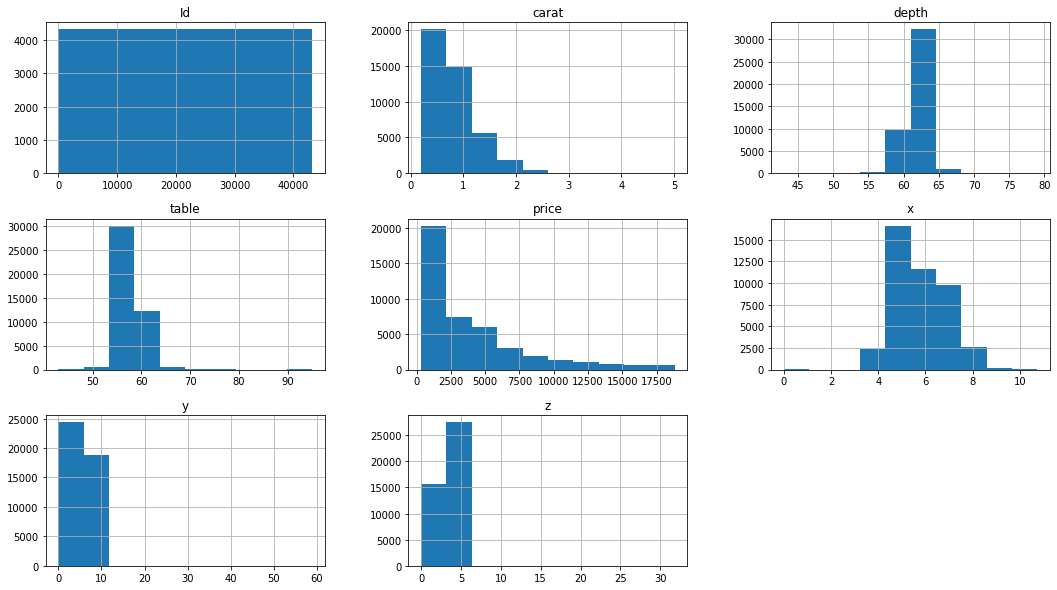

In [ ]:
dim.hist(figsize=(18,10))

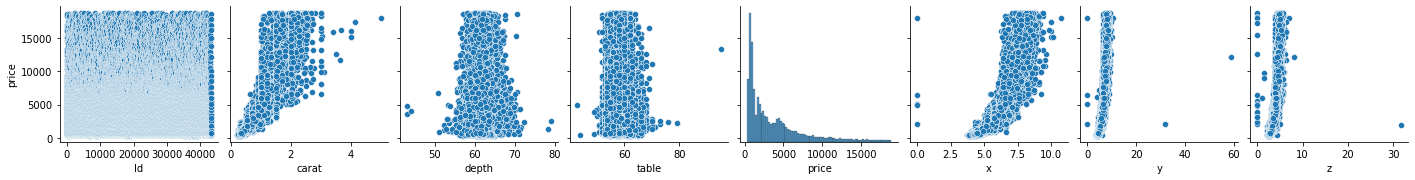

In [ ]:
sns.pairplot(dim, y_vars='price')

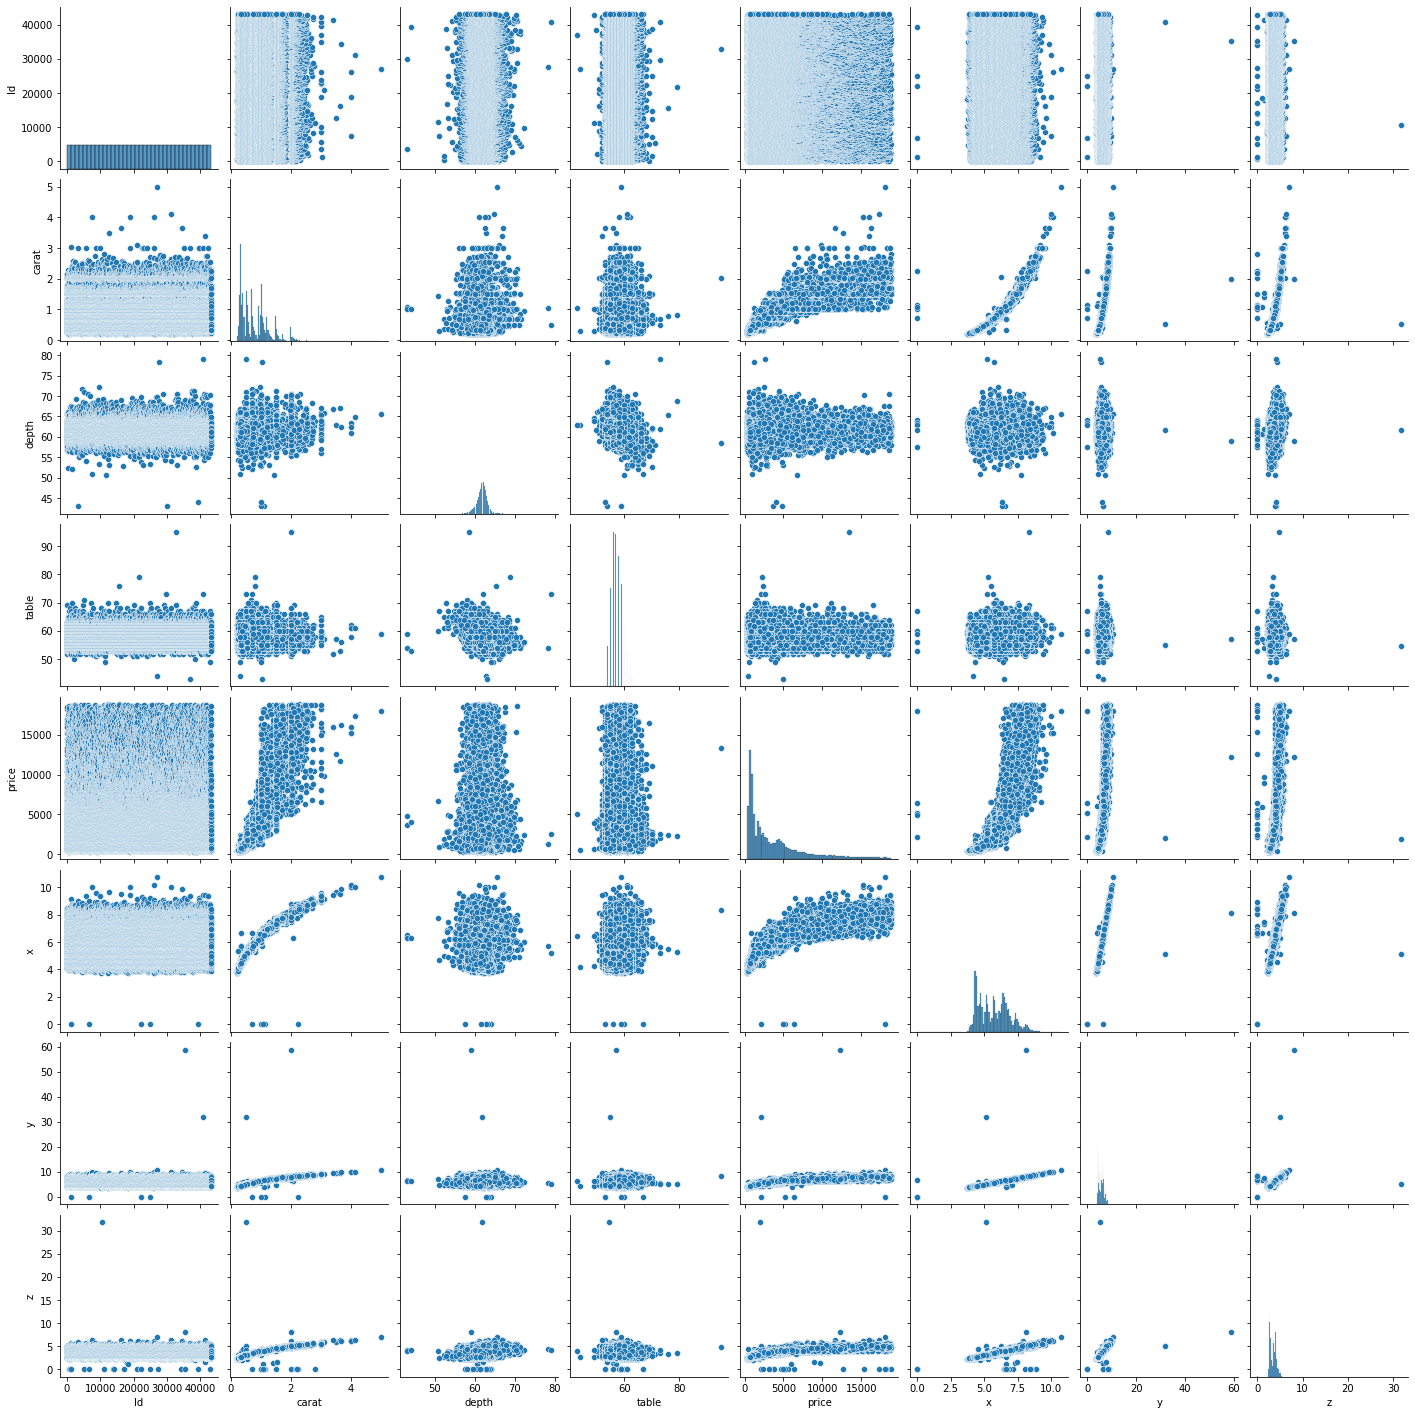

In [ ]:
sns.pairplot(dim)

In [ ]:
dim["cut"].value_counts() / len(dim)

Ideal        0.398661
Premium      0.257532
Very Good    0.223813
Good         0.089938
Fair         0.030057
Name: cut, dtype: float64

In [ ]:
corr_matrix = dim.corr()
corr_matrix

,Id,carat,depth,table,price,x,y,z
Id,1.000000,0.001141,-0.000776,-0.000739,-0.001111,-0.000519,0.001660,-0.000981
carat,0.001141,1.000000,0.023944,0.182889,0.921911,0.975760,0.947060,0.948923
depth,-0.000776,0.023944,1.000000,-0.302794,-0.013137,-0.029601,-0.033354,0.090834
table,-0.000739,0.182889,-0.302794,1.000000,0.128501,0.197342,0.184310,0.150746
price,-0.001111,0.921911,-0.013137,0.128501,1.000000,0.885181,0.861354,0.857665
x,-0.000519,0.975760,-0.029601,0.197342,0.885181,1.000000,0.968954,0.965677
y,0.001660,0.947060,-0.033354,0.184310,0.861354,0.968954,1.000000,0.942670
z,-0.000981,0.948923,0.090834,0.150746,0.857665,0.965677,0.942670,1.000000


In [ ]:
corr_matrix['price'].sort_values(ascending=False)

price    1.000000
carat    0.921911
x        0.885181
y        0.861354
z        0.857665
table    0.128501
Id      -0.001111
depth   -0.013137
Name: price, dtype: float64

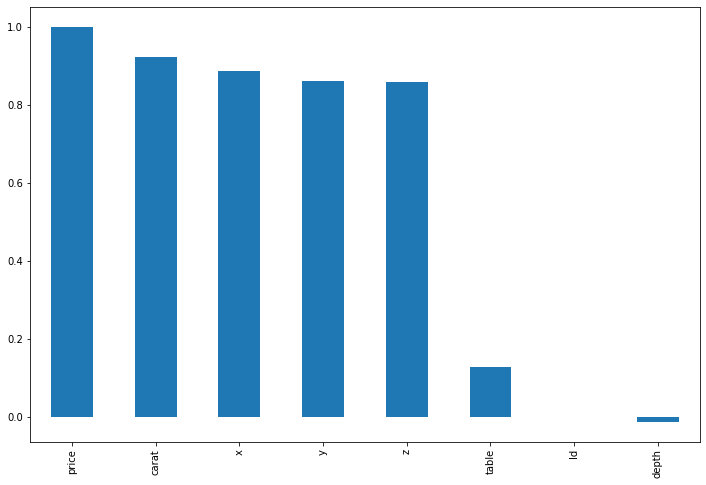

In [ ]:
plt.figure(figsize = (12,8))
corr_matrix['price'].sort_values(ascending = False).plot(kind = 'bar')


Text(0.5, 1.0, 'Correlation Heatmap')

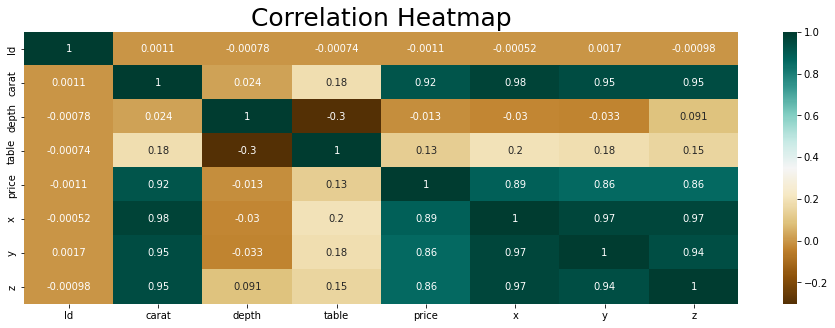

In [ ]:
plt.figure(figsize = (16,5))
heato=sns.heatmap(corr_matrix ,cmap='BrBG' ,annot=True )
heato.set_title('Correlation Heatmap', fontdict={'fontsize':25})

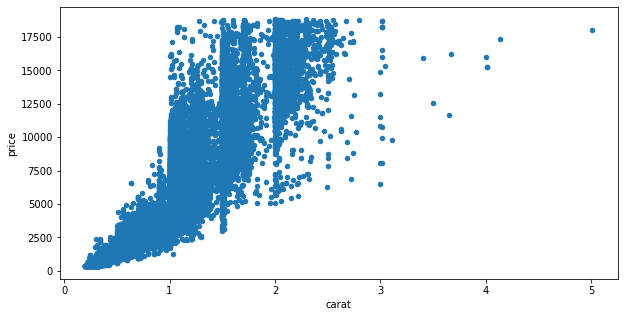

In [ ]:
dim.plot.scatter(x='carat', y='price' ,figsize=(10,5))

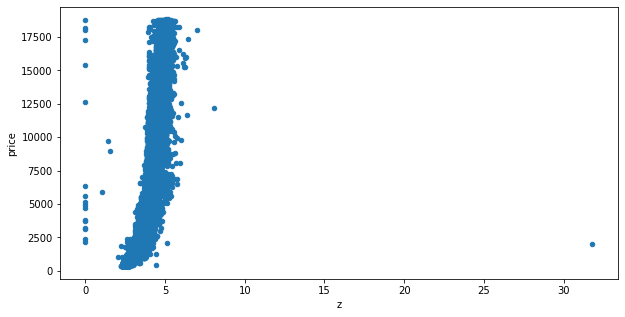

In [ ]:
dim.plot.scatter(x='z', y='price' ,figsize=(10,5))

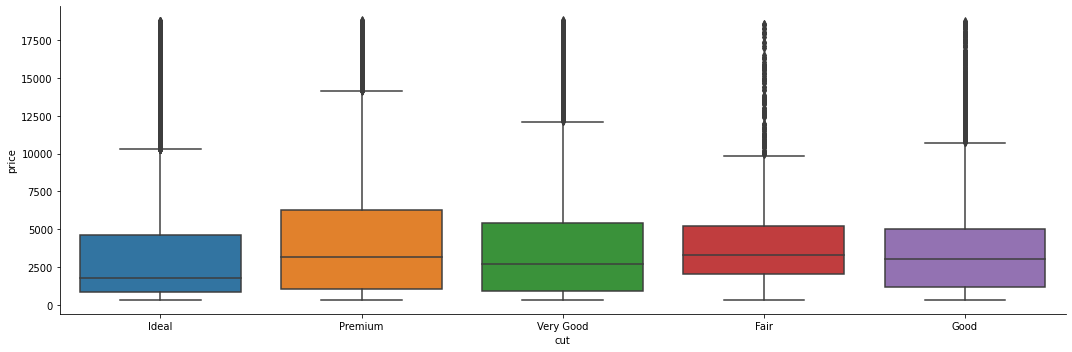

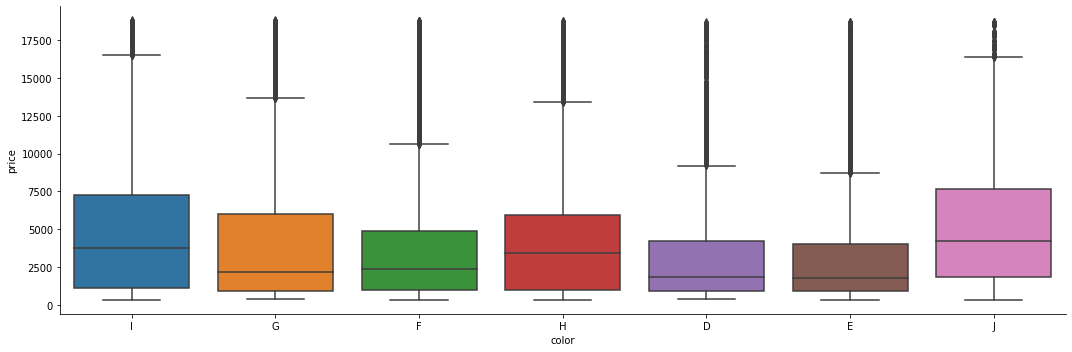

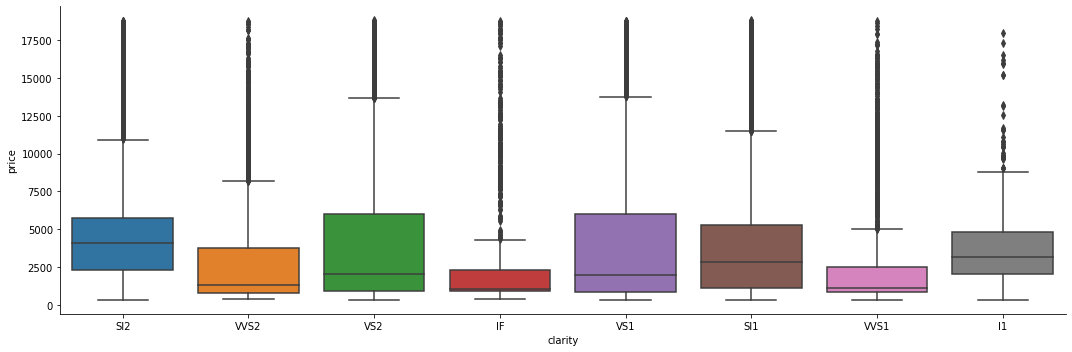

In [ ]:
input_cat_columns = dim.select_dtypes(include = ['object']).columns.to_list()

for col in input_cat_columns:
    sns.catplot(x=col, y="price", kind="box", dodge=False, height = 5, aspect = 3,data=dim);

# **replacing zero values with the mean value of the column:**

In [ ]:
zero_in_cols = ['x', 'z', 'y']
for i in zero_in_cols:
  watcher=0
  if watcher==0:
       val=dim[i].mean()
  else:
    x=+1
    val=val
  dim[i] = dim[i].replace(0,val)


# **Removing the outliers:**

In [ ]:
Q1=dim['depth'].quantile(0.25)
Q3=dim['depth'].quantile(0.75)
IQR=Q3-Q1
idx=~((dim['depth']<(Q1 - 1.5*IQR)) | (dim['depth'] >(Q3 + 1.5*IQR)))
d1=dim[idx]

In [ ]:
Q1x=dim['x'].quantile(0.25)
Q3x=dim['x'].quantile(0.75)
IQRx=Q3x-Q1x
idxx=(d1['x']>(Q1x - 1.5*IQRx)) & (d1['x'] <(Q3x + 1.5*IQRx))
dx=d1[idxx]

In [ ]:
Q1y=dim['y'].quantile(0.25)
Q3y=dim['y'].quantile(0.75)
IQRy=Q3y-Q1y
idxy=(dx['x']>(Q1y - 1.5*IQRy)) & (dx['x'] <(Q3y + 1.5*IQRy))
dy=dx[idxy]

In [ ]:
Q1z=dim['z'].quantile(0.25)
Q3z=dim['z'].quantile(0.75)
IQRz=Q3z-Q1z
idxz=(dy['z']>(Q1z - 1.5*IQRz)) & (dy['z'] <(Q3z + 1.5*IQRz))
dz=dy[idxz]

In [ ]:
Q1ca=dim['carat'].quantile(0.25)
Q3ca=dim['carat'].quantile(0.75)
IQRca=Q3-Q1
idxca=(dz['carat']>(Q1ca - 1.5*IQRca)) & (dz['x'] <(Q3ca + 1.5*IQRca))
dca=dz[idx]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [ ]:
Q1ta=dim['table'].quantile(0.25)
Q3ta=dim['table'].quantile(0.75)
IQRta=Q3ta-Q1ta
idxta=(dca['table']>(Q1ta - 1.5*IQRta)) & (dca['x'] <(Q3ta + 1.5*IQRta))
d=dca[idxta]

# **splitting the original train set into train and test sets:**
/// which preferred before start data processing 

In [ ]:
x=d.drop('price', axis=1)
y=d['price'].copy()

In [ ]:
x_train, x_test , y_train , y_test = train_test_split(x, y, test_size=0.25 , random_state=42)


In [ ]:
x_train.describe()

,Id,carat,depth,table,x,y,z
count,32364.000000,32364.000000,32364.000000,32364.000000,32364.000000,32364.000000,32364.000000
mean,21632.859072,0.798211,61.748693,57.470804,5.730681,5.733319,3.539388
std,12425.651306,0.476352,1.430930,2.228841,1.124286,1.125704,0.712128
min,3.000000,0.200000,43.000000,43.000000,3.740000,3.710000,1.070000
25%,10886.750000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,21670.500000,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000
75%,32398.250000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,78.200000,95.000000,10.740000,31.800000,31.800000


# **processing the data:**

In [ ]:
x_cop=x_train.copy()
encoder= LabelEncoder()

x_cop['cut']=encoder.fit_transform(x_cop['cut'])
cut_symbols= {index:label for index, label in enumerate (encoder.classes_)}

x_cop['color']=encoder.fit_transform(x_cop['color'])
color_symbols= {index:label for index, label in enumerate (encoder.classes_)}

x_cop['clarity']=encoder.fit_transform(x_cop['cut'])
clarity_symbols= {index:label for index, label in enumerate (encoder.classes_)}

print (cut_symbols)
print (color_symbols)
print (clarity_symbols)





{0: 'Fair', 1: 'Good', 2: 'Ideal', 3: 'Premium', 4: 'Very Good'}
{0: 'D', 1: 'E', 2: 'F', 3: 'G', 4: 'H', 5: 'I', 6: 'J'}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}


In [ ]:
scaleru = StandardScaler()
final_data= scaleru.fit_transform(x_cop)


# **processing data in x_test set:**

In [ ]:
x_cotest=x_test.copy()
encoder= LabelEncoder()

x_cotest['cut']=encoder.fit_transform(x_cotest['cut'])
cut_symbols= {index:label for index, label in enumerate (encoder.classes_)}

x_cotest['color']=encoder.fit_transform(x_cotest['color'])
color_symbols= {index:label for index, label in enumerate (encoder.classes_)}

x_cotest['clarity']=encoder.fit_transform(x_cotest['cut'])
clarity_symbols= {index:label for index, label in enumerate (encoder.classes_)}

scaleru = StandardScaler()
test_data= scaleru.fit_transform(x_cotest)


# **start Selecting and Training some Models**

**1. LinearRegression model**

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(final_data, y_train)

LinearRegression()

In [ ]:
dim1_predictions = lin_reg.predict(test_data)
lin_mse = mean_squared_error(y_test, dim1_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1357.5750394756237

*** Using Cross-Validation***

In [ ]:
lin_scores = cross_val_score(lin_reg, final_data, y_train, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

print("Scores: ", lin_rmse_scores)
print("Mean: ", lin_rmse_scores.mean())
print("Standard Deviation: ", lin_rmse_scores.std())

Scores:  [1397.40784237 1342.2416347  1336.58515295 1327.17336139 1388.4478525
 1601.99871247 1368.27009821 1323.95510525 1338.57947988 1314.47826103]
Mean:  1373.9137500744303
Standard Deviation:  80.42137686995504


**2. Decision Tree Regressor model**


In [ ]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(final_data, y_train)

DecisionTreeRegressor()

In [ ]:
dimtree_predictions = tree_reg.predict(test_data)
tree_mse = mean_squared_error(y_test, dimtree_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

1590.439588702946

*** Using Cross-Validation***

In [ ]:
scores = cross_val_score(tree_reg, final_data, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
print("Scores: ", tree_rmse_scores)
print("Mean: ", tree_rmse_scores.mean())
print("Standard Deviation: ", tree_rmse_scores.std())

Scores:  [1678.40637414 1642.33138358 1579.86366086 1650.63039006 1610.30468838
 1627.85954922 1613.86528101 1522.09935491 1739.10933721 1576.04777811]
Mean:  1624.0517797484515
Standard Deviation:  56.7377715835219


**3. RandomForest Model:**

In [ ]:
rand_for= RandomForestRegressor()
rand_for.fit(final_data, y_train)


RandomForestRegressor()

In [ ]:
ranfor_predictions = rand_for.predict(test_data)
tree_mse = mean_squared_error(y_test, ranfor_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

1170.339271185444

## Evaluation Models Using Cross-Validation


In [ ]:
forest_scores = cross_val_score(rand_for ,final_data, y_train,scoring = "neg_mean_squared_error", cv = 10)
forest_rmse_scores = np.sqrt(-forest_scores)
print("Scores: ", forest_rmse_scores)
print("Mean: ", forest_rmse_scores.mean())
print("Standard Deviation: ", forest_rmse_scores.std())

Scores:  [1208.40785726 1171.71534854 1137.22208725 1079.1764336  1195.94661587
 1107.71537291 1150.90997847 1163.03870056 1156.97367854 1105.35971672]
Mean:  1147.6465789712474
Standard Deviation:  38.88213588916559


# **processing the test data:**

In [ ]:
fin=test_df.copy()
encoder= LabelEncoder()

fin['cut']=encoder.fit_transform(fin['cut'])
cut_symbols= {index:label for index, label in enumerate (encoder.classes_)}

fin['color']=encoder.fit_transform(fin['color'])
color_symbols= {index:label for index, label in enumerate (encoder.classes_)}

fin['clarity']=encoder.fit_transform(fin['cut'])
clarity_symbols= {index:label for index, label in enumerate (encoder.classes_)}

scaleru = StandardScaler()
final_test= scaleru.fit_transform(fin)

In [ ]:

predictions=pd.Series(rand_for.predict(final_test))
pred=pd.DataFrame({'Id': test_df['Id'], 'price': predictions})

In [ ]:
pred

,Id,price
0,1,1376.26
1,2,872.43
2,3,5409.26
3,4,12246.95
4,5,1180.88
...,...,...
10783,10784,NaN
10784,10785,NaN
10785,10786,NaN
10786,10787,NaN


# **Final Tune using Grid Search:**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
              {'n_estimators': [3,10,30], 'max_features':[2,4,6,8]},
              {'bootstrap':[False], 'max_features':[2,3,4],'n_estimators':[3,10]}
]
fore_reg = RandomForestRegressor(random_state = 42)

grid_search = GridSearchCV(fore_reg, param_grid,cv = 5, scoring = 'neg_mean_squared_error',return_train_score = True)
grid_search.fit(final_data, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
     print(np.sqrt(-mean_score), params)

1332.2241710067567 {'max_features': 2, 'n_estimators': 3}
1195.7018396914766 {'max_features': 2, 'n_estimators': 10}
1155.7358529737996 {'max_features': 2, 'n_estimators': 30}
1318.4555039302638 {'max_features': 4, 'n_estimators': 3}
1194.0638975180045 {'max_features': 4, 'n_estimators': 10}
1156.8421697534095 {'max_features': 4, 'n_estimators': 30}
1304.6827713634225 {'max_features': 6, 'n_estimators': 3}
1197.1646967375573 {'max_features': 6, 'n_estimators': 10}
1165.2983859954277 {'max_features': 6, 'n_estimators': 30}
1338.7564374711144 {'max_features': 8, 'n_estimators': 3}
1210.1461302539415 {'max_features': 8, 'n_estimators': 10}
1170.743721858307 {'max_features': 8, 'n_estimators': 30}
1323.2912021686466 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
1210.2756423287042 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
1336.6486703030441 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
1208.5052627102496 {'bootstrap': False, 'max_features': 3, 'n_

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.01480178, 0.32390128, 0.00366159, 0.0275021 , 0.00310778,
       0.0128415 , 0.01296099, 0.22271375, 0.25577589, 0.12273334])

In [ ]:
final_model = grid_search.best_estimator_
final_model


RandomForestRegressor(max_features=2, n_estimators=30, random_state=42)

In [ ]:
final_predictions = final_model.predict(test_data)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

1180.7877512548123

In [ ]:
final_predictions=pd.Series(rand_for.predict(final_test))
final_pred=pd.DataFrame({'Id': test_df['Id'], 'price': final_predictions})